# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [94]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [96]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,171,106,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183
1,581,89,36,68,141,59,8,139,47,18,130,166,291,127,73,7,1,189,196
2,711,100,54,102,206,65,10,198,33,23,164,224,587,240,72,4,11,187,196
3,664,90,43,72,157,64,8,136,49,18,145,158,279,167,64,4,6,201,209
4,663,89,47,83,169,61,8,164,40,20,150,189,402,190,72,7,10,187,193
5,152,93,35,72,172,62,7,149,44,19,124,169,334,125,62,5,30,203,210
6,550,86,38,58,119,56,4,118,57,17,129,140,208,152,78,9,2,184,186
7,234,93,42,64,158,68,9,134,49,18,142,163,268,170,71,7,13,192,201
8,268,86,39,60,140,60,7,119,55,17,134,140,212,141,61,7,8,200,207
9,206,92,46,79,176,64,8,162,41,20,149,183,396,178,67,2,10,191,198


Methods `describe` and `info` deliver some useful information.

In [97]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000
mean,417.712204,93.480874,44.794171,81.936248,168.710383,61.699454,8.601093,168.426230,40.965392,20.550091,147.626594,188.457195,437.510018,174.881603,72.562842,6.306011,12.275046,188.890710,195.61020
std,240.321282,8.153528,6.048427,15.734845,33.207129,7.631500,4.678269,32.516202,7.747891,2.522842,14.145390,30.713898,171.952395,32.131950,7.700019,4.759276,8.595690,6.180001,7.41627
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,182.00000
25%,216.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,319.000000,151.000000,67.000000,2.000000,5.000000,185.000000,190.00000
50%,419.000000,92.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,366.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.00000
75%,620.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,159.000000,216.000000,586.000000,199.000000,76.000000,9.000000,18.000000,193.000000,201.00000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,186.000000,320.000000,998.000000,264.000000,135.000000,22.000000,40.000000,204.000000,211.00000


In [98]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [99]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pd.DataFrame(X_train).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.027529,1.536825,1.523408,1.339890,-0.232402,-1.927912,-0.984400,2.418654,-1.804120,2.558936,1.300082,2.526984,2.645526,2.090742,1.616684,-0.484972,-0.148471,-1.277978,-1.701893
1,0.680076,-0.550064,-1.455286,-0.886501,-0.835232,-0.354048,-0.128603,-0.905797,0.779581,-1.011723,-1.247238,-0.731841,-0.852815,-1.491515,0.056825,0.145951,-1.312905,0.017701,0.052608
2,1.221512,0.800276,1.523408,1.276279,1.123964,0.432884,0.299295,0.910338,-1.029010,0.971977,1.158564,1.158278,0.870161,2.028442,-0.073163,-0.484972,-0.148471,-0.306219,0.052608
3,1.025762,-0.427306,-0.296905,-0.632056,-0.352968,0.301729,-0.128603,-0.998142,1.037952,-1.011723,-0.185855,-0.992546,-0.922666,-0.245512,-1.113069,-0.484972,-0.730688,1.961219,1.807109
4,1.021597,-0.550064,0.365027,0.067667,0.008729,-0.091737,-0.128603,-0.136248,-0.124714,-0.218243,0.167940,0.017689,-0.206699,0.470939,-0.073163,0.145951,-0.264914,-0.306219,-0.352277
5,-1.106662,-0.059031,-1.620769,-0.632056,0.099154,0.039418,-0.342553,-0.597977,0.392026,-0.614983,-1.671791,-0.634076,-0.602518,-1.553815,-1.373045,-0.274664,2.063955,2.285138,1.942071
6,0.550964,-0.918338,-1.124320,-1.522613,-1.498344,-0.747514,-0.984400,-1.552217,2.071432,-1.408463,-1.317997,-1.579135,-1.335947,-0.712763,0.706767,0.566566,-1.196462,-0.792099,-1.297008
7,-0.765141,-0.059031,-0.462388,-1.140946,-0.322827,0.826350,0.085346,-1.059706,1.037952,-1.011723,-0.398131,-0.829605,-0.986695,-0.152062,-0.203151,0.145951,0.084416,0.503580,0.727416
8,-0.623535,-0.918338,-0.958837,-1.395391,-0.865373,-0.222892,-0.342553,-1.521436,1.813062,-1.408463,-0.964203,-1.579135,-1.312664,-1.055414,-1.503033,0.145951,-0.497801,1.799259,1.537186
9,-0.881758,-0.181789,0.199544,-0.186778,0.219720,0.301729,-0.128603,-0.197812,0.004471,-0.218243,0.097181,-0.177840,-0.241624,0.097138,-0.723104,-0.905587,-0.264914,0.341620,0.322531


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [100]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

In [101]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', 
                        max_iter= 1000, tol=1e-3)

params = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(-20, 20, 100)
}


grid_cv = GridSearchCV(estimator=lr, 
                        param_grid=params, 
                        cv=StratifiedKFold(n_splits=5))

In [102]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='d...
        10.70707071,  11.11111111,  11.51515152,  11.91919192,
        12.32323232,  12.72727273,  13.13131313,  13.53535354,
        13.93939394,  14.34343434,  14.74747475,  15.15151515,
        15.55555556,  15.95959596,  16.36363636,  16.76767677,


In [103]:
print(grid_cv.best_params_)
C_ = grid_cv.best_params_['C']
penalty_ = grid_cv.best_params_['penalty']

{'C': 7.070707070707069, 'penalty': 'l2'}


In [104]:
from sklearn.metrics import roc_curve, accuracy_score, f1_score

def out_score(y_true, y_pred):
    print('accuracy = {}, f1 = {}'.format(
        accuracy_score(y_true, y_pred), 
        f1_score(y_true, y_pred, average='macro')))

lr_best = LogisticRegression(penalty=penalty_, C = C_, 
                             solver='saga', multi_class='multinomial')
lr_best.fit(X_train, y_train)
    
out_score(y_test, lr_best.predict(X_test))

accuracy = 0.8080808080808081, f1 = 0.8060244217962338


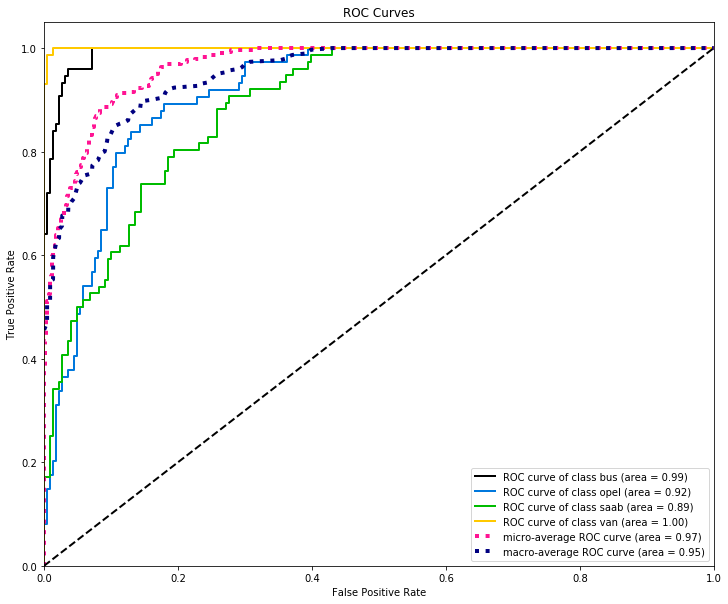

In [105]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, lr_best.predict_proba(X_test), figsize = (12, 10))

In [106]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

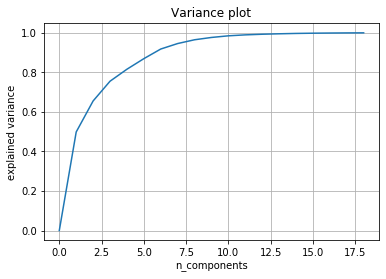

In [107]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA().fit(X_train)
variance_list = pca.explained_variance_ratio_

variance_list = [sum(variance_list[:i]) for i in range(len(variance_list))]

plt.plot(variance_list)

plt.title('Variance plot')
plt.ylabel('explained variance')
plt.xlabel('n_components')
plt.grid()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [108]:
### YOUR CODE HERE
n_components = 10
model = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [109]:
### YOUR CODE HERE
grid_cv.fit(X_train_pca, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='d...
        10.70707071,  11.11111111,  11.51515152,  11.91919192,
        12.32323232,  12.72727273,  13.13131313,  13.53535354,
        13.93939394,  14.34343434,  14.74747475,  15.15151515,
        15.55555556,  15.95959596,  16.36363636,  16.76767677,


In [110]:
print(grid_cv.best_params_)
C_ = grid_cv.best_params_['C']
penalty_ = grid_cv.best_params_['penalty']

{'C': 7.474747474747474, 'penalty': 'l2'}


In [111]:
lr_best = LogisticRegression(penalty=penalty_, C = C_, solver='saga', multi_class='multinomial')
lr_best.fit(X_train_pca, y_train)
y_pred = lr_best.predict(X_test_pca)
    
out_score(y_test, y_pred)

accuracy = 0.8080808080808081, f1 = 0.8060244217962338


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [112]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
model = DecisionTreeClassifier()

params = {
    'max_depth': np.arange(1, 15),
}

grid_cv_tree = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_tree.fit(X_train, y_train)

print(grid_cv_tree.best_params_)

depth = grid_cv_tree.best_params_['max_depth']

{'max_depth': 10}


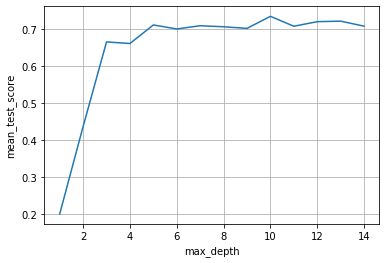

In [113]:
plt.plot(np.arange(1, 15), grid_cv_tree.cv_results_['mean_test_score'])
plt.xlabel("max_depth")
plt.ylabel('mean_test_score')
plt.grid()

In [114]:
dtree_best = DecisionTreeClassifier(max_depth = depth)

dtree_best.fit(X_train, y_train)
y_pred = dtree_best.predict(X_test)
out_score(y_test, y_pred)

accuracy = 0.6599326599326599, f1 = 0.6627222340784453


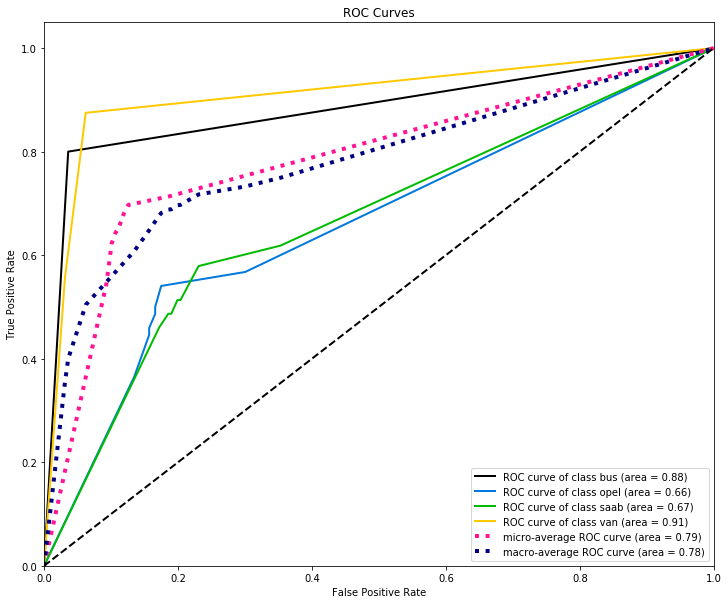

In [115]:
plot_roc(y_test, dtree_best.predict_proba(X_test), figsize = (12, 10))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [116]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


model = BaggingClassifier(base_estimator=lr_best)

params = {
    'n_estimators': np.arange(2, 100, 5)
}

In [117]:
grid_cv_bagging = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_bagging.fit(X_train, y_train)

print(grid_cv_bagging.best_params_)

best_n_estimators = grid_cv_bagging.best_params_['n_estimators']

{'n_estimators': 12}


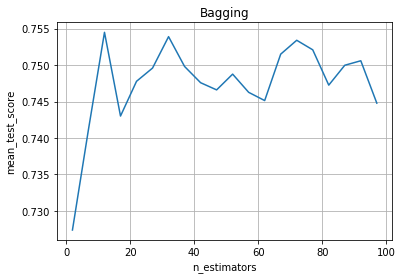

In [118]:
plt.plot(params['n_estimators'], grid_cv_bagging.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Bagging")
plt.grid()

In [119]:
bagging_best = BaggingClassifier(base_estimator=lr_best, n_estimators = best_n_estimators)
bagging_best.fit(X_train, y_train)
y_pred = bagging_best.predict(X_test)

out_score(y_test, y_pred)

accuracy = 0.7946127946127947, f1 = 0.7922942743139787


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [120]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
model = RandomForestClassifier()
params = {
    'n_estimators': np.arange(2, 100, 5)
}

In [121]:
grid_cv_rand_forest = GridSearchCV(estimator=model, 
                    param_grid=params, 
                    scoring='precision_macro', 
                    cv=StratifiedKFold(n_splits=5))

grid_cv_rand_forest.fit(X_train, y_train)

print(grid_cv_rand_forest.best_params_)

best_n_estimators_r = grid_cv_rand_forest.best_params_['n_estimators']

{'n_estimators': 97}


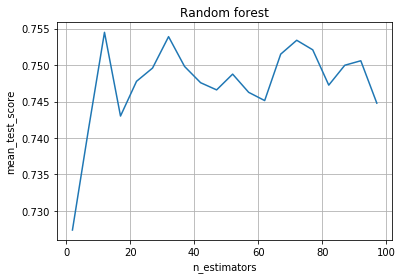

In [122]:
plt.plot(params['n_estimators'], grid_cv_bagging.cv_results_['mean_test_score'])
plt.xlabel("n_estimators")
plt.ylabel('mean_test_score')
plt.title("Random forest")
plt.grid()

In [123]:
forest_best = RandomForestClassifier(n_estimators = best_n_estimators_r)
forest_best.fit(X_train, y_train)
y_pred = forest_best.predict(X_test)

out_score(y_test, y_pred)

accuracy = 0.7575757575757576, f1 = 0.7500857790832935


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [124]:
def metrics_calc(X_train_part, X_test_part, y_train_part, y_test_part, model, model_name):
    accuracy, f1 = [], []
    all_train_part = []
    
    cv = StratifiedKFold(n_splits=10)
    for train_part, test_part in cv.split(X_train_part, y_train_part):
        all_train_part.extend(test_part)
        
        model.fit(X_train_part[all_train_part], y_train_part[all_train_part])
        y_pred = model.predict(X_test_part)
        
        accuracy.append(accuracy_score(y_test_part, y_pred))
        f1.append(f1_score(y_test_part, y_pred, average='macro'))
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    for ax, metric, title in zip(axs, [accuracy, f1], ['accuracy score', 'f1 score']):
        ax.plot(np.arange(10)/10, metric,label = model_name)
        ax.set_xlabel('Training set size')
        ax.set_ylabel('score')
        ax.set_title(title)
        ax.grid()
        ax.legend()
    
    fig.show()

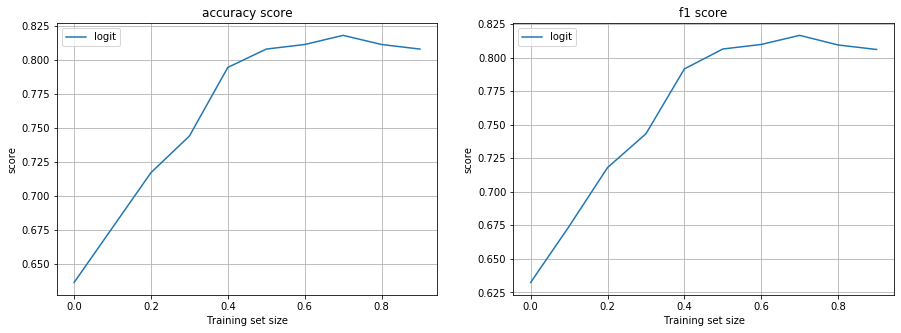

In [125]:
metrics_calc(X_train, X_test, y_train, y_test, lr_best, 'logit')

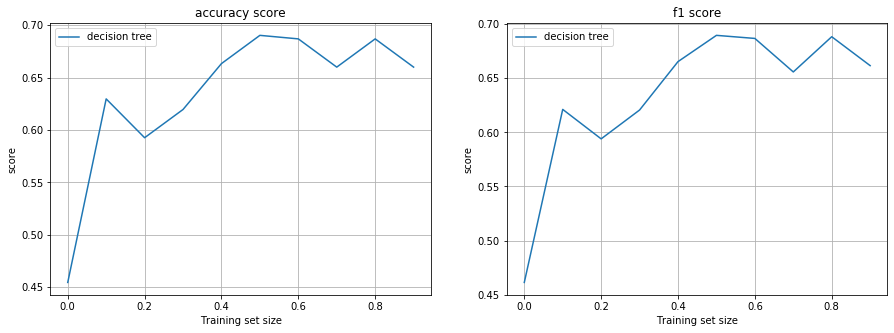

In [126]:
metrics_calc(X_train, X_test, y_train, y_test, dtree_best, 'decision tree')

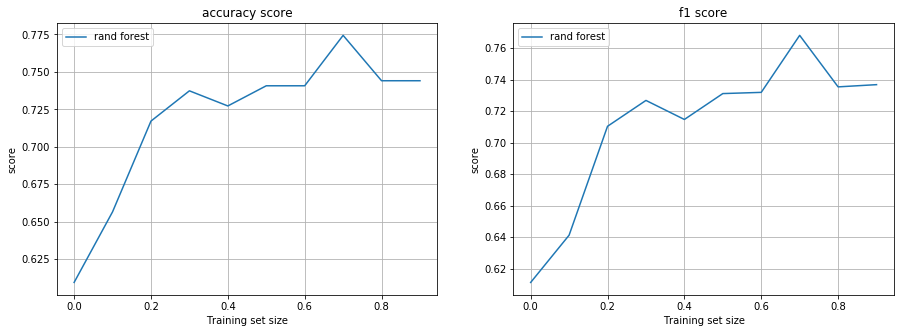

In [127]:
metrics_calc(X_train, X_test, y_train, y_test, forest_best, 'rand forest')